# Redes

**Número de enlaces**

$$L=\frac{1}{2}\sum_{i=1}^N k_i$$ 

Donde $k_i$ es el grado del nodo $i$. Visto desde el punto de vista de la matriz de adyacencia se tiene

$$L=\frac{1}{2}\sum_{i,j=1}^N A_{ij}$$

**Grado promedio** 

$$\langle k\rangle=\frac{1}{N}\sum_{i=1}^N  k_i=\frac{2L}{N}$$

**Número máximo de enlaces**

$$L_\max=\begin{pmatrix}
N\\
2
\end{pmatrix}=\frac{N(N-1)}{2}$$

    

# Desempolvando redes

In [5]:
using Random
using LinearAlgebra
using Plots
using LaTeXStrings
using Graphs
using GraphPlot
using StatsBase
using Distributions

plotlyjs()

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

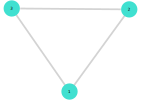

In [2]:
g = Graph(3)

#Agregamos enlaces con esta función, notemos que la función Graph() ya tiene el número de nodos de la red
add_edge!(g,1,2)
add_edge!(g,1,3)
add_edge!(g,2,3)

gplot(g,nodelabel=1:3)

In [3]:
A = [0 1 1;1 0 1;1 1 0]

3×3 Matrix{Int64}:
 0  1  1
 1  0  1
 1  1  0

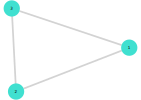

In [4]:
G = Graph(A)
gplot(G,nodelabel=1:3)

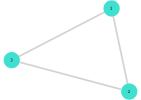

In [5]:
G = Graph(3,3)
gplot(G,nodelabel=1:3)

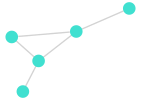

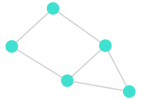

In [6]:
#notemos que la función display, despliega las dos gráficas que se tienen en consideración.
# Esto es interesante porque sin esa función no se despliegan las dos.
for i in ["bull","house"]
    g = smallgraph(i)
    display(gplot(g))
end

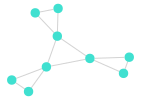

In [10]:
#Otros generadores de redes.
G = CliqueGraph(3,3)

gplot(G)

# Red Lineal

In [2]:
function Lineal(N)
    g = Graph(N)
    for i in 1:N
        add_edge!(g,i,i+1)
    end
    return g#gplot(g,nodelabel=1:N)
end

Lineal (generic function with 1 method)

# Red circular 

In [3]:
function Circular(N)
    g = Graph(N)
    for i in 1:N
        add_edge!(g,i,i+1)
    end
    add_edge!(g,N,1)
    return g#gplot(g,nodelabel=1:N)
end

Circular (generic function with 1 method)

# Red  Anillo

In [25]:
function Anillo(N,j)
    g = Graph(N)
    for i in 1:N
        for k in 1:j
            add_edge!(g,i,i+k)
            if i == 1
                add_edge!(g,i,N+1-k)
            elseif i == N
                add_edge!(g,i,k)
            end
        end
    end
    #add_edge!(g,N,1)
    #add_edge!(g,N,2)
    return gplot(g,layout=circular_layout, nodelabel=1:N),g
end

Anillo (generic function with 1 method)

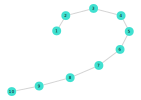

In [13]:
Lineal(10)

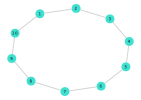

In [14]:
Circular(10)

In [30]:
p,g = Anillo(10,3)

(Context(BBox{l,t,r,b,w,h = 0.0w,0.0h, 1.0w,1.0h, 1.0w,1.0h}, UnitBox{Float64, Float64, Float64, Float64}(-1.2, -1.2, 2.4, 2.4, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(BBox{l,t,r,b,w,h = 0.0w,0.0h, 1.0w,1.0h, 1.0w,1.0h}, nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.LinePrimitive}(Compose.LinePrimitive[Compose.LinePrimitive{Tuple{Measure, Measure}}(Tuple{Measure, Measure}[(0.976659085588597cx, 0.07553278569230427cy), (0.8323579087863503cx, 0.5425012030575906cy)]), Compose.LinePrimitive{Tuple{Measure, Measure}}(Tuple{Measure, Measure}[(0.9550582608824103cx, 0.06504029585638817cy), (0.3539587334925372cx, 0.9349597041436118cy)]), Compose.LinePrimitive{Tuple{Measure, Measure}}(Tuple{Measure, Measure}[(0.9371770478679714cx, 0.04799246488165452cy), (-0.24619404224291874cx, 0.9520075351183455cy)]), Compose.LinePrimitive{Tuple{Measure, Measure}}(Tuple{Measure, Measure}[(0.9371770478679714cx, -0.04799246488165452cy), (-0.24619404224291894

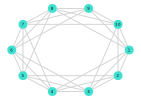

In [33]:
p

In [36]:
g.fadjlist

10-element Vector{Vector{Int64}}:
 [2, 3, 4, 8, 9, 10]
 [1, 3, 4, 5, 10]
 [1, 2, 4, 5, 6, 10]
 [1, 2, 3, 5, 6, 7]
 [2, 3, 4, 6, 7, 8]
 [3, 4, 5, 7, 8, 9]
 [4, 5, 6, 8, 9, 10]
 [1, 5, 6, 7, 9, 10]
 [1, 6, 7, 8, 10]
 [1, 2, 3, 7, 8, 9]

# Modelos de red aleatoria

## Modelo GNL

Este modelo contempla una serie de $N$ nodos conectados con una serie de $L$ enlaces dados de manera aleatoria.


In [3]:
function enlaces(N,L)
    enlaces = zeros(L,2)
    for i in 1:L
        a = sample(1:N)
        b = sample(1:N)
        if a != b
            enlaces[i,1] = a
            enlaces[i,2] = b
        end     
    end
    return enlaces
end

function GNL(N,L)
    nodos = enlaces(N,L)
    
    g = Graph(N)
    for i in 1:L
        add_edge!(g,nodos[i,1],nodos[i,2])
    end
    
    while g.ne < L
        conj = collect(1:N)
        nodo1 = sample(conj)
        nodo2 = sample(collect(setdiff(conj,nodo1)))
        add_edge!(g,nodo1,nodo2)
    end
    
    return g
end


GNL (generic function with 1 method)

In [3]:
g = GNL(100,150)

{100, 150} undirected simple Int64 graph

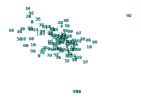

In [4]:
gplot(g,nodelabel=1:100)

##  Modelo GNP

Es un modelo de red aleatoria que va en funciónd de una probabilidad de enlace. Dados $N$ nodos, para cada uno de ellos se define una probabilidad de 0 a 1 para determinar si será enlazado o no, de tal forma que el criterio es que si dado un número aleatorio, si es menor a $p$ entonces existe enlace, caso contrario no se define enlace.

In [3]:
function enlacesAleatorios(N,p)
    Channel() do channel
        for i in 1:N
            for j in 1:i
                if rand() < p && i != j
                    put!(channel,(i,j))
                end
            end
        end
    end
end

function redAleatoria(N,p)
    g = Graph(N)
    enlaces = collect(enlacesAleatorios(N,p))
    for i in 1:length(enlaces)
        add_edge!(g,enlaces[i][1],enlaces[i][2])
    end
    return g
end

redAleatoria (generic function with 1 method)

In [6]:
g = redAleatoria(100,0.8)

{100, 3984} undirected simple Int64 graph

#  Red de Albert Barabasi

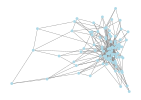

In [6]:
using Graphs
using GraphPlot

"""
n:=número de nodos totales
m:=número de enlaces nuevos por nodo; con este parámetro definimos la red inicial a partir de una red GNL

La idea del algorítmo es construir una red inicial aleatoria tipo GNL para asegurarnos que sea mayormente conexa
(la GNP no lo asegura al 100% a menos de que ocupemos la teoría de punto crítico pero eso lo veremos después). 
Se verifica si es conexa mediante un condicional y si si generamos el algorítmo de albert barabasi que consiste en
definit probabilidades de enlace en función del grado de cada nodo j dividido entre el grado total (suma de grados).
De aquí definimos un vector de m entradas que serán los nuevos nodos a los que irán conectados un último y nuevo 
nodo.

targets funciona de tal manera que hace una selección desde el nodo 1 hasta el nodo nv(G) y por medio de las
probabilidades se van eligiendo esos nodos. Por ejemplo para la primera entrada del vector será más probable que
se escoga el número entre 1 y nv(G) que tenga la probabilidad más alta en probabilities. Por ejemplo si el vector
de probabilities en su tercera entrada tiene un grado alto (probabilidad alta), es muy probable que el nodo que 
vaya a salir seleccionado entre 1 y nv(G) es el 3 (porque le corresponde la tercera entrada). De aquí actúa el 
replace y el 3 ya no puede ser escogido en futuras ocasiones pero el procedimiento se repite para la siguiente 
entrada del vector targets, y así hasta acabar con todos.

Posteriormente se agrega un nodo extra para poder conectar los targets a este nodo extra y la manera de conectarlos
es por medio del índice i del ciclo for que justamente coincide con el nodo agregado, de aquí nada más falta
conectar ese nodo extra con todos los nodos de target. Y bueno este procedimiento se realiza iteradamente hasta
terminar con los valores de n.
"""

function barabasi_albert(n, m)
    # Inicializar un grafo completo con m nodos
    G = Circular(m) #GNL(m,m)
    if is_connected(G)
        # Implementar el modelo de Barabási-Albert
        for i in m+1:n
            # Calcular las probabilidades de conexión para nodos existentes
            probabilities = [degree(G, j) / sum(degree(G, k) for k in vertices(G)) for j in vertices(G)]

            # Elegir m nodos existentes basados en las probabilidades
            targets = sample(1: nv(G),Weights(probabilities),m,replace=false)

            # Agregar un nuevo nodo
            add_vertex!(G)

            # Conectar el nuevo nodo a los nodos seleccionados
            for target in targets
                add_edge!(G,i,target)
            end
        end
    end
    return G
end

# Parámetros del modelo
nodos_totales = 100
nuevos_enlaces_por_nodo = 3

# Crear la red utilizando el modelo de Barabási-Albert
red_barabasi_albert = barabasi_albert(nodos_totales, nuevos_enlaces_por_nodo)

# Visualizar la red
gplot(red_barabasi_albert,nodefillc="lightblue", edgestrokec="gray",layout=spectral_layout)


In [7]:
nv(red_barabasi_albert)

100

In [8]:
red_barabasi_albert = barabasi_albert(1000,6)
degrees = degree(red_barabasi_albert)

# Calcula la distribución de grado
degree_counts = countmap(degrees)

# Obtiene los valores de grado y sus frecuencias
degrees_values = sort(collect(keys(degree_counts)))
degree_frequencies = [degree_counts[deg] for deg in degrees_values]

# Grafica en escala log-log
scatter(degrees_values, degree_frequencies, xscale=:log10, yscale=:log10, xlabel="Grado", ylabel="Frecuencia", legend=false)

In [9]:
adjacency_matrix(red_barabasi_albert)

1000×1000 SparseArrays.SparseMatrixCSC{Int64, Int64} with 11940 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿⣿⣿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢿⣿⣿⣿⣿⣾⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⣽⣯⣿⡿⡿⣿⣫⢷⣽⣿⣿⣽⣿⣽⣿⣟⢿⣿⣿⢩⣿⡏
⣿⣿⣿⣿⣿⣿⣟⣿⣿⣻⣟⣿⣯⣿⣿⡿⣿⣷⣿⡻⣿⣿⣿⣻⡫⣿⣟⢿⣿⣝⢻⣟⢿⡿⣿⢟⣿⡿⢙⡅
⣿⣿⣿⣿⣿⣽⣯⡿⣿⣿⣿⢿⢝⣿⣿⡿⣷⡿⣿⣿⣿⣶⢱⣽⡍⡻⣟⣷⣓⠪⢒⡎⡦⣉⡇⠿⡻⡾⣾⢞
⣿⣯⣿⣿⣿⣻⣿⣿⣮⡿⣿⢶⣹⣽⣎⣿⣿⣿⡭⣘⢟⣿⡒⢇⣯⣤⢿⡝⢵⢽⣏⣧⣾⢾⣽⢢⣧⣧⡿⡃
⣿⣿⣿⣿⣿⣽⣿⣟⢻⣟⣻⢞⣾⣿⡟⣽⢉⡽⣾⣿⣠⣷⣳⣿⣿⣵⣻⠭⣩⡭⠛⣓⣼⣿⡂⣸⣳⡟⠕⢞
⣿⣿⣿⣿⣯⣿⣷⣵⣗⣾⣾⣿⢥⣳⣺⡺⣗⢅⣟⠾⣻⢦⢣⡽⣿⣻⢪⣛⢹⢧⢇⡶⡺⣜⣻⢠⠦⢿⣾⡕
⣿⣿⣿⣿⣿⡿⣿⡿⣮⣽⣟⣭⣺⡺⢿⢗⣬⣟⣧⡻⡿⢟⣫⣊⢳⡷⡭⣔⣛⣺⢿⢅⠏⣾⣭⢻⣥⣓⢽⡷
⣿⣷⣿⢿⢿⣿⣽⡿⣿⣿⣇⡴⠝⢝⣦⢿⢮⠓⣧⢿⡎⢲⠽⡺⡛⢝⠰⡖⠟⣮⢽⢸⡧⢙⠆⡯⠼⣾⣿⣉
⣿⣿⡷⣿⣿⡻⣿⣿⣃⢫⣾⣿⣻⡝⣭⡻⣭⣟⣤⣻⣶⠽⡿⠏⡭⡿⡒⡾⣐⣟⣧⢙⠷⣐⡃⣔⡘⠶⣒⣈
⣿⣿⣿⡿⣿⣿⢻⣿⣿⣵⢤⣾⠻⣞⣿⢏⢪⣉⣜⡟⣄⠙⠸⣷⡯⣷⠩⡮⢎⡟⣸⢎⣯⠇⢑⢭⢭⠩⡌⡺
⣿⣿⣿⣯⣿⣻⣕⣶⠼⢌⣽⣾⣍⡶⡫⢺⣳⡣⡿⠏⢶⣦⣤⡻⡿⢲⠌⡕⣾⢭⡳⠝⢘⠳⢉⣔⡩⡀⡇⢋
⣿⣿⢯⣞⣯⣮⣧⡩⠋⣿⢟⣿⣿⣻⢽⡶⣟⢌⣧⡯⢯⣯⢻⣋⡐⡨⣏⡤⢰⣳⢥⠙⡎⡹⣘⠓⣤⢳⣎⢈
⣿⣿⣷⣿⣿⣝⢿⣽⣟⠷⡟⡞⣮⢲⢃⢯⢰⠦⣸⡬⡣⡦⢆⠥⠋⡽⣴⡻⠖⢆⣤⣸⡥⢔⣶⡙⢀⡤⣨⠨
⣿⣿⣟⣿⣟⢿⡹⡘⣕⣗⡇⡾⠷⣖⣻⣸⡻⣥⣴⢼⣮⠵⡞⣟⢴⣲⠸⢅⢄⡱⠩⠌⠡⡇⡸⡝⠄⡊⠲⠉
⣿⣿⣟⣿⣿⢶⡸⠴⠯⣽⢿⢠⢩⡵⠟⢗⣓⣓⣍⢛⡲⢞⣝⠎⣅⠓⣀⣻⡃⠆⠪⡢⠑⢾⢉⡢⠣⠆⠋⡄
⣿⣷⣿⢿⣿⡷⡌⢫⣺⣟⣶⣿⣚⢮⣫⣥⣍⢋⢙⢣⠯⠟⢶⡐⣎⡩⢁⢏⠥⠦⣱⣄⠀⡠⡌⣣⣌⠩⠥⠅
⣿⣿⣿⣷⣿⢟⣭⡍⠳⣛⣈⣨⠛⣚⣧⣛⡬⡥⢉⢬⡕⣔⢃⢴⢶⠘⣜⠻⣖⠮⠣⡰⠦⣩⢔⢑⠳⣥⠀⠠
⣻⣿⡟⣛⣿⡿⣻⡮⠭⣿⣽⠾⣬⣇⢥⢻⣲⣧⢲⡌⡇⡓⠃⠪⢤⣛⠀⡴⡠⠡⠩⠆⡆⡙⠝⣦⡤⢋⡩⢂
⣿⣿⡿⠿⠗⠴⣺⢟⠿⠫⣱⢅⢞⠿⢷⡷⡟⢻⡘⢸⣢⡩⡭⢉⡊⢙⡂⡚⡜⠂⠋⠤⠅⠇⠀⡀⠣⢊⠔⡡

In [10]:
Matrix(adjacency_matrix(red_barabasi_albert))

1000×1000 Matrix{Int64}:
 0  1  0  0  0  1  1  1  1  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  1  1  1  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  0  0  1  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  1  0  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  1  1  0  1  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  1  0  1  1  1  1  0  1  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  0  1  1  1  0  1  0     0  0  0  0  0  0  0  0  0  1  0  0
 1  1  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  1  0  1  1  1  0  0  0  1  1     0  0  0  1  0  0  0  0  0  0  0  0
 0  1  0  1  1  1  1  1  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  0  0  0  1  0  1  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  1  1  1  1  0  0  0  1     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  1  1  1  0  1  1  0  0  1  0 